<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#TOC" data-toc-modified-id="TOC-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>TOC</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-0.3.1"><span class="toc-item-num">0.3.1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#SAEB-marks-distribution" data-toc-modified-id="SAEB-marks-distribution-0.3.2"><span class="toc-item-num">0.3.2&nbsp;&nbsp;</span>SAEB marks distribution</a></span></li></ul></li><li><span><a href="#SAEB-Growth" data-toc-modified-id="SAEB-Growth-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>SAEB Growth</a></span><ul class="toc-item"><li><span><a href="#Identify-the-schools-with-most-SAEB-variation-from-2005-to-2017" data-toc-modified-id="Identify-the-schools-with-most-SAEB-variation-from-2005-to-2017-0.4.1"><span class="toc-item-num">0.4.1&nbsp;&nbsp;</span>Identify the schools with most SAEB variation from 2005 to 2017</a></span></li><li><span><a href="#Identify-schools-that-jumped-from-low-/-very-low-IDEB-(<5-/-<4)-and-went-to-high-IDEB-(>-6),-from-2005-to-2017." data-toc-modified-id="Identify-schools-that-jumped-from-low-/-very-low-IDEB-(<5-/-<4)-and-went-to-high-IDEB-(>-6),-from-2005-to-2017.-0.4.2"><span class="toc-item-num">0.4.2&nbsp;&nbsp;</span>Identify schools that jumped from low / very low IDEB (&lt;5 / &lt;4) and went to high IDEB (&gt; 6), from 2005 to 2017.</a></span></li><li><span><a href="#Model-neighboors:-which-schools-had-a-large-delta-and-were-nearby-schools-on-the-highest-attention-level-(4)?" data-toc-modified-id="Model-neighboors:-which-schools-had-a-large-delta-and-were-nearby-schools-on-the-highest-attention-level-(4)?-0.4.3"><span class="toc-item-num">0.4.3&nbsp;&nbsp;</span>Model neighboors: which schools had a large delta and were nearby schools on the highest attention level (4)?</a></span></li><li><span><a href="#See-if-the-education-census-contains-information-on-who-was-the-principal-of-each-school-each-year." data-toc-modified-id="See-if-the-education-census-contains-information-on-who-was-the-principal-of-each-school-each-year.-0.4.4"><span class="toc-item-num">0.4.4&nbsp;&nbsp;</span>See if the education census contains information on who was the principal of each school each year.</a></span></li></ul></li></ul></li><li><span><a href="#Faz-o-mapa-com-os-pares-de-escolas" data-toc-modified-id="Faz-o-mapa-com-os-pares-de-escolas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Faz o mapa com os pares de escolas</a></span></li></ul></div>

In [1]:
# Import config
import os
import sys
sys.path.insert(0, '../')
from config import RAW_PATH, TREAT_PATH, OUTPUT_PATH

# DATA ANALYSIS & VIZ TOOLS
from copy import deepcopy

import pandas as pd
pd.options.display.max_columns = 999

import geopandas as gpd
from shapely.wkt import loads
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline
pylab.rcParams['figure.figsize'] = (12, 15)

# CONFIGS
%load_ext autoreload
#%autoreload 2

#import warnings
#warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/home/almeida2808/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['loads']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
palette = ['#FEC300', '#F1920E', '#E3611C', '#C70039', '#900C3F', '#5A1846', '#3a414c', '#29323C']
sns.set()

## TOC

1. [Premisses](#)

## Methodology

The goal is to determine the "model" schools in a certain ratio. We'll define those "models" as schools that had a great grown and stands nearby "high risk" schools, the ones in the lowest strata. For that, we construct the model below with suggestions by Ragazzo.

The original analysis looked only to IDEB. Now, we focus on SAEB scores, a subcomponent of IDEB that is achieveable in only one way.

We are interested in the following groups:
 - Group 1: Schools from very low (< 4) to high (> 6)
 - Group 2: Schools from low (4 < x < 5) to high (> 6)
 - Group 3: Schools went to high (> 6) with delta > 2
 
The *attention level* (or risk) of a school is defined by which quartile it belongs on IDEB 2017 distribution (most recent), from the lowest quartile (level 4) to the highest (level 1).

## Results

1. [Identify the schools with most SAEB variation from 2005 to 2017](#1)

2. [Identify schools that jumped from low / very low SAEB (<5 / <4) and went to high SAEB (> 6), from 2005 to 2017](#2)

2. [Model neighboors: which schools had a large delta and were nearby schools on the highest attention level (4)?](#3)

5. See if the education census contains information on who was the principal of each school each year.

### Import data

In [7]:
import os
os.getcwd()

'/home/almeida2808/Dropbox/my_cloud/SeN/Demandas Pontuais/Professores/Ragazzo/Educação/pr-educacao/notebooks'

In [8]:
proto_kepler = pd.read_csv(OUTPUT_PATH / "ideb_merged_kepler.csv", index_col=0)

In [29]:
proto_kepler["ano"] = proto_kepler["ano"].apply(lambda x: int(x[0:4]))
proto_kepler.head()

,ano,cod_inep,geometry,ideb,nome_abrev,nome_escola,lon,lat
0,2005,33140111,POINT (-43.63601828509798 -22.98632664816865),3.6,EM EMMA D'AVILA DE CAMILLIS,1026018 ESCOLA MUNICIPAL EMMA DAVILA DE CAMILLIS,-43.636018,-22.986327
1,2005,33140120,POINT (-43.63061141412631 -22.92095886212502),4.0,EM MANOEL PORTO FILHO,1019060 ESCOLA MUNICIPAL MANOEL PORTO FILHO,-43.630611,-22.920959
2,2005,33140154,POINT (-43.65817006396811 -22.93248534941013),4.0,EM PROF° JORGE GONÇALVES FARINHA,1019059 ESCOLA MUNICIPAL PROFESSOR JORGE GONCA...,-43.658170,-22.932485
3,2005,33146136,POINT (-43.62796962386766 -23.00163603612894),5.1,EM PROFª ELISA JOAQUINA DALTRO PEIXOTO,1026020 ESCOLA MUNICIPAL PROFESSORA ELISA JOAQ...,-43.627970,-23.001636
6,2005,33074763,POINT (-43.34848701721742 -22.84106860685418),4.6,EM VELINDA MAURÍCIO DA FONSECA,0515009 ESCOLA MUNICIPAL VELINDA MAURICIO DA F...,-43.348487,-22.841069


In [37]:
proto_kepler["inep_ano"] = proto_kepler.apply(lambda x: str(x.cod_inep) + "_" + str(x.ano), axis = 1)

In [11]:
proto_kepler.cod_inep.nunique()

817

In [26]:
#import SAEB data
saeb_rio = pd.read_csv("../data/treated/ideb_rio.csv")
saebs = [x for x in saeb_rio.columns if "media_padrao" in x]
saebs.append('cod_inep')
saeb_rio = saeb_rio[saebs]
saeb_rio.head()

,saeb_2005_media_padrao,saeb_2007_media_padrao,saeb_2009_media_padrao,saeb_2011_media_padrao,saeb_2013_media_padrao,saeb_2015_media_padrao,saeb_2017_media_padrao,cod_inep
0,4.287994854,-,-,4.774195,4.712133935,5.293360167,5.850869535045106,33062358.0
1,5.010575769,4.816703678,5.996371964,6.63075434,6.289520472,6.248212353,5.678480222068009,33062420.0
2,4.29645912,4.093843164,5.516517696,5.05844414,5.660357391,6.211515614,6.183916030534351,33062439.0
3,4.418246017,4.164991672,-,5.462483,5.828477446,5.698014573,5.90458986814712,33062447.0
4,5.085307695,5.164491325,5.292430257,5.87386051,6.433638446,6.071360861,6.084149895905622,33062455.0


In [31]:
for column in saeb_rio.columns:
    if column[0:5] == "saeb_":
        saeb_rio[column] = saeb_rio[column].apply(lambda x: float(x) if x != "-" else np.nan)
saeb_rio.head()

,saeb_2005_media_padrao,saeb_2007_media_padrao,saeb_2009_media_padrao,saeb_2011_media_padrao,saeb_2013_media_padrao,saeb_2015_media_padrao,saeb_2017_media_padrao,cod_inep
0,4.287995,NaN,NaN,4.774195,4.712134,5.293360,5.850870,33062358.0
1,5.010576,4.816704,5.996372,6.630754,6.289520,6.248212,5.678480,33062420.0
2,4.296459,4.093843,5.516518,5.058444,5.660357,6.211516,6.183916,33062439.0
3,4.418246,4.164992,NaN,5.462483,5.828477,5.698015,5.904590,33062447.0
4,5.085308,5.164491,5.292430,5.873861,6.433638,6.071361,6.084150,33062455.0


In [32]:
saeb_rio.shape

(867, 8)

In [33]:
saeb_rio_long = pd.melt(saeb_rio, id_vars = "cod_inep")
saeb_rio_long.head()

,cod_inep,variable,value
0,33062358.0,saeb_2005_media_padrao,4.287995
1,33062420.0,saeb_2005_media_padrao,5.010576
2,33062439.0,saeb_2005_media_padrao,4.296459
3,33062447.0,saeb_2005_media_padrao,4.418246
4,33062455.0,saeb_2005_media_padrao,5.085308


In [34]:
saeb_rio_long.columns = ["cod_inep", "origem", "saeb"]

In [44]:
saeb_rio_long["ano"] = saeb_rio_long["origem"].apply(lambda x: int(x[5:9]))
saeb_rio_long.head()

,cod_inep,origem,saeb,ano,inep_ano
0,33062358.0,saeb_2005_media_padrao,4.287995,2005,33062358_2005
1,33062420.0,saeb_2005_media_padrao,5.010576,2005,33062420_2005
2,33062439.0,saeb_2005_media_padrao,4.296459,2005,33062439_2005
3,33062447.0,saeb_2005_media_padrao,4.418246,2005,33062447_2005
4,33062455.0,saeb_2005_media_padrao,5.085308,2005,33062455_2005


In [43]:
saeb_rio_long["inep_ano"] = saeb_rio_long.apply(lambda x: str(int(x.cod_inep)) + "_" + str(x.ano), axis = 1)

In [45]:
joined_data = pd.merge(proto_kepler, saeb_rio_long[["inep_ano", "saeb"]], how = "left", on = "inep_ano")
joined_data.head()

,ano,cod_inep,geometry,ideb,nome_abrev,nome_escola,lon,lat,inep_ano,saeb
0,2005,33140111,POINT (-43.63601828509798 -22.98632664816865),3.6,EM EMMA D'AVILA DE CAMILLIS,1026018 ESCOLA MUNICIPAL EMMA DAVILA DE CAMILLIS,-43.636018,-22.986327,33140111_2005,4.454667
1,2005,33140120,POINT (-43.63061141412631 -22.92095886212502),4.0,EM MANOEL PORTO FILHO,1019060 ESCOLA MUNICIPAL MANOEL PORTO FILHO,-43.630611,-22.920959,33140120_2005,4.342673
2,2005,33140154,POINT (-43.65817006396811 -22.93248534941013),4.0,EM PROF° JORGE GONÇALVES FARINHA,1019059 ESCOLA MUNICIPAL PROFESSOR JORGE GONCA...,-43.658170,-22.932485,33140154_2005,4.107117
3,2005,33146136,POINT (-43.62796962386766 -23.00163603612894),5.1,EM PROFª ELISA JOAQUINA DALTRO PEIXOTO,1026020 ESCOLA MUNICIPAL PROFESSORA ELISA JOAQ...,-43.627970,-23.001636,33146136_2005,5.225543
4,2005,33074763,POINT (-43.34848701721742 -22.84106860685418),4.6,EM VELINDA MAURÍCIO DA FONSECA,0515009 ESCOLA MUNICIPAL VELINDA MAURICIO DA F...,-43.348487,-22.841069,33074763_2005,4.808740


### SAEB marks distribution

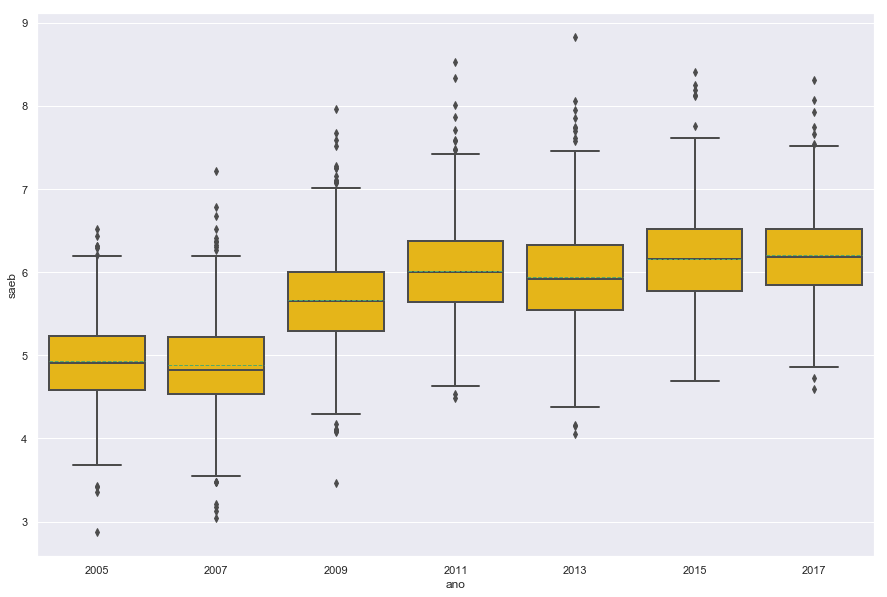

In [47]:
pylab.rcParams['figure.figsize'] = (15, 10)
ax = sns.boxplot(x='ano', y='saeb', data=joined_data, 
            color=palette[0], saturation=0.8, linewidth=2,
            showmeans=True, meanline=True)

In [48]:
ideb_stats = joined_data.pivot_table(columns='ano', index='cod_inep', values='saeb').describe()
ideb_stats

ano,2005,2007,2009,2011,2013,2015,2017
count,709.000000,726.000000,710.000000,696.000000,662.000000,624.000000,603.000000
mean,4.926260,4.882109,5.667888,6.018438,5.945578,6.162050,6.202683
std,0.497664,0.552088,0.576975,0.577551,0.621707,0.539846,0.535762
min,2.879167,3.047982,3.458352,4.491210,4.052633,4.693514,4.589047
25%,4.586241,4.534284,5.288942,5.642032,5.541010,5.776582,5.844923
50%,4.911159,4.822771,5.648397,6.007469,5.916499,6.158078,6.180112
75%,5.232804,5.215788,5.997133,6.370454,6.332633,6.516095,6.521992
max,6.515071,7.217949,7.964557,8.528368,8.824924,8.405570,8.315635


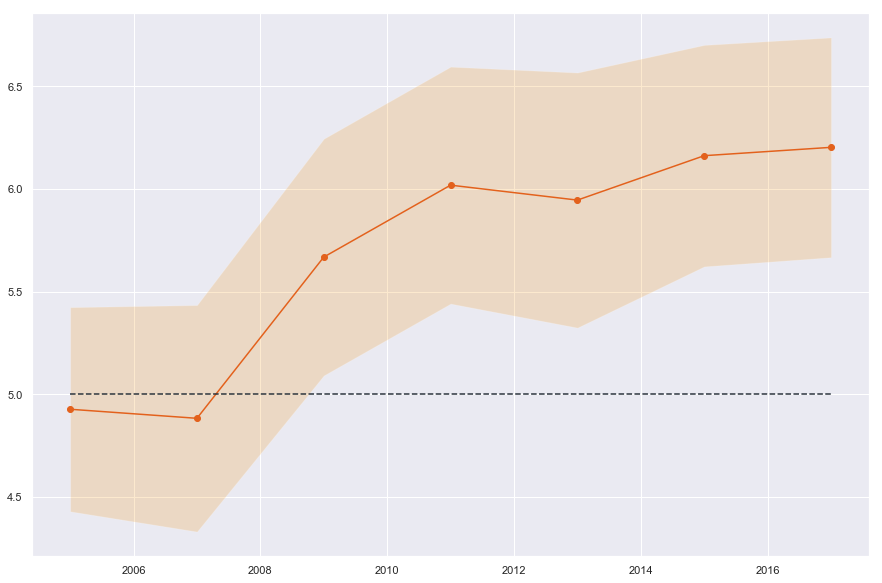

In [49]:
plt.plot(ideb_stats.loc['mean'], color=palette[2], marker='o') 
plt.fill_between(x= ideb_stats.loc['mean'].index,
                y1=ideb_stats.loc['mean']-ideb_stats.loc['std'],
                y2=ideb_stats.loc['mean']+ideb_stats.loc['std'], 
                alpha=0.2, facecolor=palette[1])

# Meta nacional: 5
x=ideb_stats.loc['mean'].index
plt.plot(pd.Series([5 for i in range(len(x))], x), color=palette[-1], linestyle='dashed')

#plt.fill_between(x, y-error, y+error)
plt.show()

<a id="1"></a>
## SAEB Growth 
### Identify the schools with most SAEB variation from 2005 to 2017

In [50]:
joined_data.head()

,ano,cod_inep,geometry,ideb,nome_abrev,nome_escola,lon,lat,inep_ano,saeb
0,2005,33140111,POINT (-43.63601828509798 -22.98632664816865),3.6,EM EMMA D'AVILA DE CAMILLIS,1026018 ESCOLA MUNICIPAL EMMA DAVILA DE CAMILLIS,-43.636018,-22.986327,33140111_2005,4.454667
1,2005,33140120,POINT (-43.63061141412631 -22.92095886212502),4.0,EM MANOEL PORTO FILHO,1019060 ESCOLA MUNICIPAL MANOEL PORTO FILHO,-43.630611,-22.920959,33140120_2005,4.342673
2,2005,33140154,POINT (-43.65817006396811 -22.93248534941013),4.0,EM PROF° JORGE GONÇALVES FARINHA,1019059 ESCOLA MUNICIPAL PROFESSOR JORGE GONCA...,-43.658170,-22.932485,33140154_2005,4.107117
3,2005,33146136,POINT (-43.62796962386766 -23.00163603612894),5.1,EM PROFª ELISA JOAQUINA DALTRO PEIXOTO,1026020 ESCOLA MUNICIPAL PROFESSORA ELISA JOAQ...,-43.627970,-23.001636,33146136_2005,5.225543
4,2005,33074763,POINT (-43.34848701721742 -22.84106860685418),4.6,EM VELINDA MAURÍCIO DA FONSECA,0515009 ESCOLA MUNICIPAL VELINDA MAURICIO DA F...,-43.348487,-22.841069,33074763_2005,4.808740


In [104]:
#We need to get wide form data once more
joined_data_wide = joined_data.pivot(index = "cod_inep", columns = "ano", values="saeb")
joined_data_wide.head()

ano,2005,2007,2009,2011,2013,2015,2017
cod_inep,,,,,,,
33062358,4.287995,NaN,NaN,4.774195,4.712134,5.293360,5.850870
33062420,5.010576,4.816704,5.996372,6.630754,6.289520,6.248212,5.678480
33062439,4.296459,4.093843,5.516518,5.058444,5.660357,6.211516,6.183916
33062447,4.418246,4.164992,NaN,5.462483,5.828477,5.698015,5.904590
33062455,5.085308,5.164491,5.292430,5.873861,6.433638,6.071361,6.084150


In [105]:
joined_data_wide.columns = ["saeb_2005", "saeb_2007", "saeb_2009", "saeb_2011", "saeb_2013", "saeb_2015", "saeb_2017"]
joined_data_wide.head()

,saeb_2005,saeb_2007,saeb_2009,saeb_2011,saeb_2013,saeb_2015,saeb_2017
cod_inep,,,,,,,
33062358,4.287995,NaN,NaN,4.774195,4.712134,5.293360,5.850870
33062420,5.010576,4.816704,5.996372,6.630754,6.289520,6.248212,5.678480
33062439,4.296459,4.093843,5.516518,5.058444,5.660357,6.211516,6.183916
33062447,4.418246,4.164992,NaN,5.462483,5.828477,5.698015,5.904590
33062455,5.085308,5.164491,5.292430,5.873861,6.433638,6.071361,6.084150


In [106]:
joined_data_wide.shape

(817, 7)

In [107]:
joined_data_wide = pd.merge(joined_data_wide, joined_data[["cod_inep", "nome_escola", "nome_abrev", "geometry"]].drop_duplicates(), how = "left", on = "cod_inep")
joined_data_wide.shape

(817, 11)

In [108]:
joined_data_wide.head()

,cod_inep,saeb_2005,saeb_2007,saeb_2009,saeb_2011,saeb_2013,saeb_2015,saeb_2017,nome_escola,nome_abrev,geometry
0,33062358,4.287995,NaN,NaN,4.774195,4.712134,5.293360,5.850870,0101501 CIEP HENFIL,CIEP HENFIL,POINT (-43.22532558878743 -22.88088832887265)
1,33062420,5.010576,4.816704,5.996372,6.630754,6.289520,6.248212,5.678480,0101004 ESCOLA MUNICIPAL BENJAMIN CONSTANT,EM BENJAMIM CONSTANT,POINT (-43.20547903150959 -22.89997040652924)
2,33062439,4.296459,4.093843,5.516518,5.058444,5.660357,6.211516,6.183916,0101003 ESCOLA MUNICIPAL DARCY VARGAS,EM DARCY VARGASS,POINT (-43.18928050487541 -22.89574001410427)
3,33062447,4.418246,4.164992,NaN,5.462483,5.828477,5.698015,5.904590,0101006 ESCOLA MUNICIPAL FRANCISCO BENJAMIM GA...,EM FRANCISCO BENJAMIM GALLOTI,POINT (-43.19983758905013 -22.90135321277852)
4,33062455,5.085308,5.164491,5.292430,5.873861,6.433638,6.071361,6.084150,0101005 ESCOLA MUNICIPAL GENERAL MITRE,EM GAL. MITRE,POINT (-43.20315257170808 -22.90508916174731)


* IDEB 2017 distribution

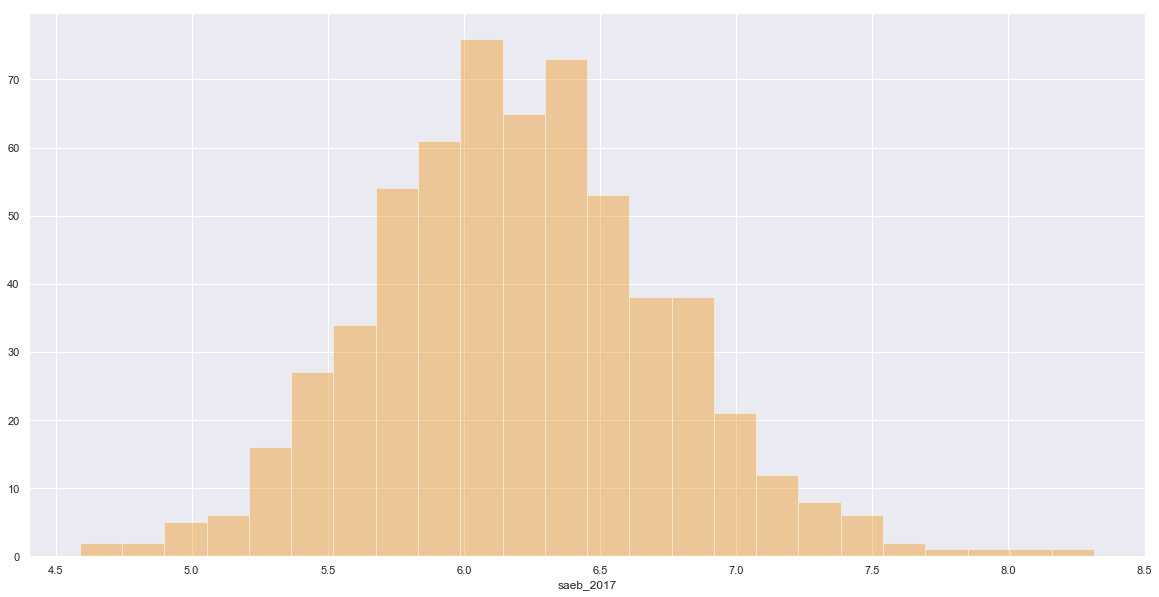

In [109]:
pylab.rcParams['figure.figsize'] = (20, 10)
sns.distplot(joined_data_wide['saeb_2017'].dropna(), color=palette[1], kde=False)

In [110]:
from shapely import wkt
joined_data_wide = gpd.GeoDataFrame(joined_data_wide)
joined_data_wide['geometry'] = joined_data_wide['geometry'].apply(lambda x: wkt.loads(x))
#joined_data_wide['geometry'] = joined_data_wide['geometry'].apply(lambda x: loads(x.encode()))
joined_data_wide.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 817 entries, 0 to 816
Data columns (total 11 columns):
cod_inep       817 non-null int64
saeb_2005      709 non-null float64
saeb_2007      726 non-null float64
saeb_2009      710 non-null float64
saeb_2011      696 non-null float64
saeb_2013      662 non-null float64
saeb_2015      624 non-null float64
saeb_2017      603 non-null float64
nome_escola    817 non-null object
nome_abrev     817 non-null object
geometry       817 non-null object
dtypes: float64(7), int64(1), object(3)
memory usage: 76.6+ KB


In [111]:
joined_data_wide.isna().sum()

cod_inep         0
saeb_2005      108
saeb_2007       91
saeb_2009      107
saeb_2011      121
saeb_2013      155
saeb_2015      193
saeb_2017      214
nome_escola      0
nome_abrev       0
geometry         0
dtype: int64

In [112]:
# All cod_inep are unique
joined_data_wide['cod_inep'].nunique()

817

In [113]:
joined_data_wide = joined_data_wide.set_index('cod_inep', drop=True)
joined_data_wide.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 817 entries, 33062358 to 33463220
Data columns (total 10 columns):
saeb_2005      709 non-null float64
saeb_2007      726 non-null float64
saeb_2009      710 non-null float64
saeb_2011      696 non-null float64
saeb_2013      662 non-null float64
saeb_2015      624 non-null float64
saeb_2017      603 non-null float64
nome_escola    817 non-null object
nome_abrev     817 non-null object
geometry       817 non-null object
dtypes: float64(7), object(3)
memory usage: 70.2+ KB


In [114]:
joined_data_wide["delta"] = joined_data_wide["saeb_2017"] - joined_data_wide["saeb_2005"]

In [115]:
joined_data_wide["delta"].describe()

count    534.000000
mean       1.271323
std        0.524172
min       -0.251685
25%        0.909922
50%        1.251550
75%        1.601120
max        3.301203
Name: delta, dtype: float64

In [116]:
joined_data_wide["delta"].nunique()

534

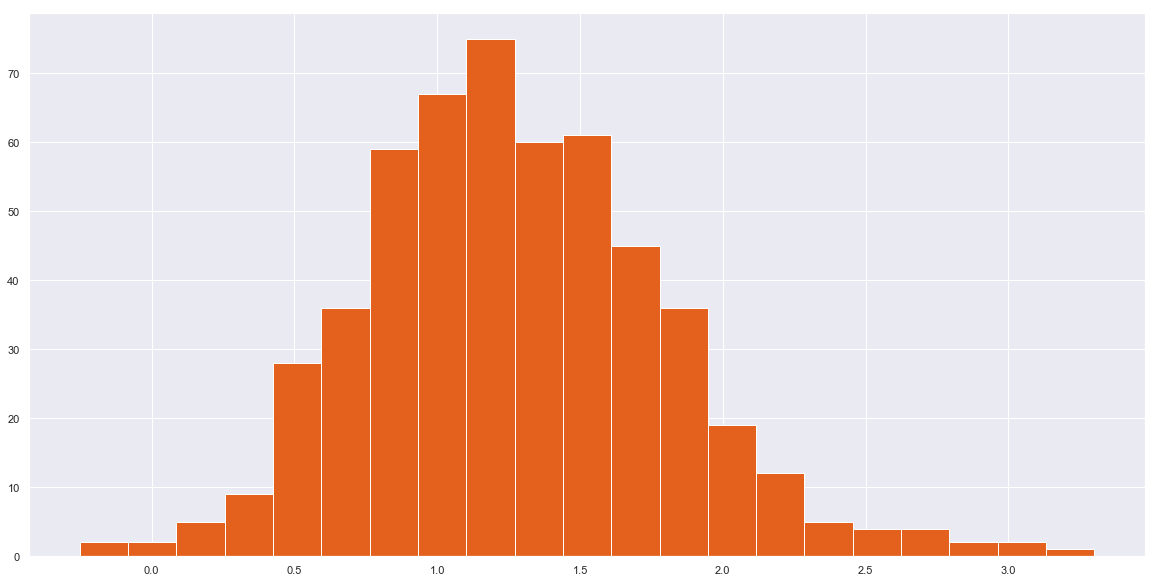

In [117]:
joined_data_wide["delta"].hist(bins='fd', color=palette[2])

In [118]:
joined_data_wide['delta'].count()

534

In [119]:
joined_data_wide['delta'].count()/len(joined_data_wide)

0.653610771113831

In [120]:
joined_data_wide.shape

(817, 11)

* Top and bottom deltas

In [121]:
# Top 15 schools in saeb growth
joined_data_wide[['nome_escola', 'saeb_2005', 'saeb_2007', 'saeb_2009', 'saeb_2011', 
          'saeb_2013', 'saeb_2015', 'saeb_2017', 'delta']].sort_values("delta", ascending = False).head(15)

,nome_escola,saeb_2005,saeb_2007,saeb_2009,saeb_2011,saeb_2013,saeb_2015,saeb_2017,delta
cod_inep,,,,,,,,,
33063265,0204502 CIEP PRESIDENTE AGOSTINHO NETO,3.857645,4.933373,6.520044,7.288479,6.803655,6.699540,7.158848,3.301203
33088390,1026202 CIEP HILDEBRANDO DE ARAUJO GOES,2.879167,4.338176,5.359336,5.583443,5.451245,5.667056,5.970743,3.091576
33146268,0716073 ESCOLA MUNICIPAL ROBERTO BURLE MARX,5.308621,5.767172,6.898639,7.582618,7.952185,8.193749,8.315635,3.007014
33080399,0833004 ESCOLA MUNICIPAL ENGENHEIRO LAFAYETTE ...,4.657516,5.283381,4.903806,6.405006,6.421230,6.687320,7.521748,2.864232
33080259,0833014 ESCOLA MUNICIPAL CHURCHILL,3.419974,3.904136,NaN,NaN,5.989727,5.772956,6.228015,2.808041
33083142,1026005 ESCOLA MUNICIPAL NARCISA AMALIA,3.429888,4.698827,6.058631,5.880582,6.055677,6.113641,6.139020,2.709132
33065004,0205007 ESCOLA MUNICIPAL PENEDO,4.716397,5.088393,6.075130,6.988586,6.943904,7.217754,7.398226,2.681828
33066256,0107004 ESCOLA MUNICIPAL FLORIANO PEIXOTO,4.789772,5.721155,6.054578,6.864783,7.006280,6.616927,7.457328,2.667557
33100551,0817127 ESCOLA MUNICIPAL AYRTON SENNA DA SILVA,5.092053,5.355570,6.837811,6.917644,7.328386,8.134118,7.743812,2.651759


In [122]:
top_15 = joined_data_wide[['geometry', 'nome_escola', 'delta']].sort_values("delta", ascending = False).head(15)

top_15['lon'] = top_15.geometry.x
top_15['lat'] = top_15.geometry.y

In [123]:
top_15[['nome_escola', 'delta']]

,nome_escola,delta
cod_inep,,
33063265,0204502 CIEP PRESIDENTE AGOSTINHO NETO,3.301203
33088390,1026202 CIEP HILDEBRANDO DE ARAUJO GOES,3.091576
33146268,0716073 ESCOLA MUNICIPAL ROBERTO BURLE MARX,3.007014
33080399,0833004 ESCOLA MUNICIPAL ENGENHEIRO LAFAYETTE ...,2.864232
33080259,0833014 ESCOLA MUNICIPAL CHURCHILL,2.808041
33083142,1026005 ESCOLA MUNICIPAL NARCISA AMALIA,2.709132
33065004,0205007 ESCOLA MUNICIPAL PENEDO,2.681828
33066256,0107004 ESCOLA MUNICIPAL FLORIANO PEIXOTO,2.667557
33100551,0817127 ESCOLA MUNICIPAL AYRTON SENNA DA SILVA,2.651759


In [35]:
top_15.to_csv(OUTPUT_PATH / 'top_15_delta.csv')

In [125]:
bottom_15 = joined_data_wide[['geometry', 'nome_escola', 'delta']].sort_values("delta", ascending = True).head(15)

bottom_15['lon'] = bottom_15.geometry.x
bottom_15['lat'] = bottom_15.geometry.y

In [126]:
bottom_15['delta']

cod_inep
33064954   -0.251685
33076154   -0.201781
33084734    0.037679
33085412    0.075172
33087369    0.128256
33068372    0.145900
33078149    0.175401
33073031    0.218386
33088063    0.250596
33063150    0.266421
33085927    0.276340
33065675    0.290307
33085420    0.306962
33082642    0.328999
33087130    0.343035
Name: delta, dtype: float64

In [127]:
bottom_15[['nome_escola', 'delta']]

,nome_escola,delta
cod_inep,,
33064954,0205003 ESCOLA MUNICIPAL DOUTOR CICERO PENNA,-0.251685
33076154,0515047 ESCOLA MUNICIPAL FREI LEOPOLDO,-0.201781
33084734,1019018 ESCOLA MUNICIPAL HAYDEA VIANNA FIUZA D...,0.037679
33085412,1120503 CIEP DOUTOR JOAO RAMOS DE SOUZA,0.075172
33087369,0625033 ESCOLA MUNICIPAL ZILDA NUNES DA COSTA,0.128256
33068372,0209021 ESCOLA MUNICIPAL PRESIDENTE JOAO GOULART,0.145900
33078149,0716068 ESCOLA MUNICIPAL MARIA DA SILVA FRANCA,0.175401
33073031,0313013 ESCOLA MUNICIPAL MINISTRO GAMA FILHO,0.218386
33088063,0625501 CIEP DOUTOR ADAO PEREIRA NUNES,0.250596


In [39]:
bottom_15.to_csv(OUTPUT_PATH / 'bottom_15_delta.csv')

<a id='2'></a>
### Identify schools that jumped from low / very low IDEB (<5 / <4) and went to high IDEB (> 6), from 2005 to 2017.

Our interest group are the following:

- Group 1: Schools from very low (< 4) to high (> 6)
- Group 2: Schools from low (4 < x < 5) to high (> 6)
- Group 3: Schools went to high (> 6) with delta > 2

In [203]:
pessimo_pra_bom = joined_data_wide[(joined_data_wide['saeb_2005'] <= 4) & (joined_data_wide['saeb_2017'] >= 6)].copy()
pessimo_pra_bom.shape

(5, 14)

In [129]:
pessimo_pra_bom.head()

,saeb_2005,saeb_2007,saeb_2009,saeb_2011,saeb_2013,saeb_2015,saeb_2017,nome_escola,nome_abrev,geometry,delta
cod_inep,,,,,,,,,,,
33063265,3.857645,4.933373,6.520044,7.288479,6.803655,6.699540,7.158848,0204502 CIEP PRESIDENTE AGOSTINHO NETO,CIEP PRES. AGOSTINHO NETO,POINT (-43.19972337709782 -22.95916715402146),3.301203
33080259,3.419974,3.904136,NaN,NaN,5.989727,5.772956,6.228015,0833014 ESCOLA MUNICIPAL CHURCHILL,EM CHURCHILL,POINT (-43.41654009436157 -22.87411109154034),2.808041
33083142,3.429888,4.698827,6.058631,5.880582,6.055677,6.113641,6.139020,1026005 ESCOLA MUNICIPAL NARCISA AMALIA,EM NARCISA AMÁLIA,POINT (-43.5375824077866 -23.00908395435429),2.709132
33083231,3.997898,4.795727,5.784050,6.081454,6.199461,6.654705,6.018823,0918021 ESCOLA MUNICIPAL PROFESSOR FELIPE SANT...,EM PROF° FELIPE SANTIAGO,POINT (-43.55998229380447 -22.93331372430114),2.020925
33085978,3.929780,4.221330,5.515749,6.243950,5.864324,5.934327,6.444075,1120020 ESCOLA MUNICIPAL BELMIRO MEDEIROS,EM BELMIRO MEDEIROS,POINT (-43.19943970227582 -22.79852875165228),2.514295


In [204]:
ruim_pra_bom = joined_data_wide[(joined_data_wide['saeb_2005'] > 4) & 
                        (joined_data_wide['saeb_2005'] <= 5) & 
                        (joined_data_wide['saeb_2017'] >= 6)].copy()
ruim_pra_bom.shape

(147, 14)

In [205]:
melhora_com_final_bom = joined_data_wide[(joined_data_wide['delta'] >= 2) & (joined_data_wide['saeb_2017'] >= 6)]
melhora_com_final_bom.shape

(42, 14)

In [132]:
len(melhora_com_final_bom[(melhora_com_final_bom.index.isin(pessimo_pra_bom.index) == False)
                          & (melhora_com_final_bom.index.isin(ruim_pra_bom.index) == False)])

6

In [133]:
melhora_com_final_bom[(melhora_com_final_bom.index.isin(pessimo_pra_bom.index) == False)
                       & (melhora_com_final_bom.index.isin(ruim_pra_bom.index) == False)]

,saeb_2005,saeb_2007,saeb_2009,saeb_2011,saeb_2013,saeb_2015,saeb_2017,nome_escola,nome_abrev,geometry,delta
cod_inep,,,,,,,,,,,
33068291,5.832745,6.517208,7.283190,7.710595,7.741815,8.405570,7.932498,0209006 ESCOLA MUNICIPAL FRIEDENREICH,EM FRIEDENREICH,POINT (-43.2287917694675 -22.9132989864157),2.099753
33082804,5.313205,5.442894,5.937958,6.744520,6.196840,6.875725,7.461205,0918024 ESCOLA MUNICIPAL DOM MEINRADO,EM DOM MEINRADO,POINT (-43.5496645070606 -22.91048658161989),2.148001
33086133,5.024845,5.436850,6.433725,6.694114,7.118221,7.084966,7.403518,1120009 ESCOLA MUNICIPAL PADRE JOSE DE ANCHIETA,EM PE. JOSÉ DE ANCHIETA,POINT (-43.20063623028346 -22.81472925665339),2.378673
33087806,5.507499,5.496628,7.679376,7.466064,7.696377,7.758135,8.066361,0724014 ESCOLA MUNICIPAL PROFESSORA DIDIA MACH...,EM PROFª DIDIA MACHADO FORTES,POINT (-43.36862307356228 -23.0092058869504),2.558862
33100551,5.092053,5.355570,6.837811,6.917644,7.328386,8.134118,7.743812,0817127 ESCOLA MUNICIPAL AYRTON SENNA DA SILVA,EM AYRTON SENNA DA SILVA,POINT (-43.47815290047215 -22.86416212141511),2.651759
33146268,5.308621,5.767172,6.898639,7.582618,7.952185,8.193749,8.315635,0716073 ESCOLA MUNICIPAL ROBERTO BURLE MARX,EM ROBERTO BURLE MARX,POINT (-43.38986811115883 -22.96862317920035),3.007014


* How many from Group 1 were in top 15?

In [134]:
pd.Series(pessimo_pra_bom.index.isin(joined_data_wide.sort_values("delta", ascending = False).head(15).index)).value_counts()

True     4
False    1
dtype: int64

In [135]:
# cria listas com os cod_inep de cada um dos critérios para poder incluir na visualização
pessimo_pra_bom_list = [int(x) for x in list(pessimo_pra_bom.index)]
ruim_pra_bom_list = [int(x) for x in list(ruim_pra_bom.index)]
melhora_com_final_bom_list = [int(x) for x in list(melhora_com_final_bom.index)]

inicial_baixo_list = [int(x) for x in list(joined_data_wide[(joined_data_wide["saeb_2005"] > 4) & (joined_data_wide["saeb_2005"] <= 5)].index)]
inicial_baixissimo_list = [int(x) for x in list(joined_data_wide[joined_data_wide["saeb_2005"] <= 4].index)]

* Separate only the schools with low/very low initial saeb for vizualization (on [kepler.gl](https://kepler.gl))

In [159]:
# crete categorie flags
joined_data["pessimo_pra_bom_bin"] = joined_data["cod_inep"].isin(pessimo_pra_bom_list)
joined_data["pessimo_pra_bom_bin"] = joined_data["pessimo_pra_bom_bin"].astype("int")

joined_data["ruim_pra_bom_bin"] = joined_data["cod_inep"].isin(ruim_pra_bom_list)
joined_data["ruim_pra_bom_bin"] = joined_data["ruim_pra_bom_bin"].astype("int")

joined_data["melhora_com_final_bom_bin"] = joined_data["cod_inep"].isin(melhora_com_final_bom_list)
joined_data["melhora_com_final_bom_bin"] = joined_data["melhora_com_final_bom_bin"].astype("int")

joined_data["inicial_baixo_bin"] = joined_data["cod_inep"].isin(inicial_baixo_list)
joined_data["inicial_baixo_bin"] = joined_data["inicial_baixo_bin"].astype("int")

joined_data["inicial_baixissimo_bin"] = joined_data["cod_inep"].isin(inicial_baixissimo_list)
joined_data["inicial_baixissimo_bin"] = joined_data["inicial_baixissimo_bin"].astype("int")

* Separate the schools by saeb 2017 quartiles to define the attencion level from each one

In [160]:
# quartile split
joined_data_wide["nivel_atencao"] = pd.qcut(joined_data_wide["saeb_2017"], 4, labels = [4, 3, 2, 1])

In [161]:
joined_data_wide[["nome_escola", "nivel_atencao", "saeb_2017"]].head(15)

,nome_escola,nivel_atencao,saeb_2017
0,0101501 CIEP HENFIL,3,5.850870
1,0101004 ESCOLA MUNICIPAL BENJAMIN CONSTANT,4,5.678480
2,0101003 ESCOLA MUNICIPAL DARCY VARGAS,2,6.183916
3,0101006 ESCOLA MUNICIPAL FRANCISCO BENJAMIM GA...,3,5.904590
4,0101005 ESCOLA MUNICIPAL GENERAL MITRE,3,6.084150
5,0101008 ESCOLA MUNICIPAL MARECHAL ESPERIDIAO R...,2,6.242870
6,0101007 ESCOLA MUNICIPAL MARECHAL MASCARENHAS ...,NaN,NaN
7,0101804 EDI PROFESSORA LAURA SYLVIA MENDES PER...,NaN,NaN
8,0101009 ESCOLA MUNICIPAL PROFESSOR WALTER CARL...,NaN,NaN
9,0101001 ESCOLA MUNICIPAL VICENTE LICINIO CARDOSO,NaN,NaN


In [162]:
joined_data_wide.groupby("nivel_atencao")["saeb_2017"].agg(["min", "mean", "max"])

,min,mean,max
nivel_atencao,,,
4,4.589047,5.544619,5.841923
3,5.847922,6.022481,6.180112
2,6.180912,6.352182,6.521491
1,6.522492,6.892440,8.315635


In [163]:
joined_data_wide["nivel_atencao"].value_counts()

1    151
3    151
4    151
2    150
Name: nivel_atencao, dtype: int64

<a id="3"></a>
### Model neighboors: which schools had a large delta and were nearby schools on the highest attention level (4)?

In [164]:
joined_data_wide = joined_data_wide.reset_index()

In [165]:
joined_data_wide["cod_inep"] = joined_data_wide["cod_inep"].apply(lambda x: int(x))

In [166]:
proto_kepler = pd.merge(joined_data, joined_data_wide[['cod_inep', 'nivel_atencao']], how="left", on="cod_inep")

In [167]:
proto_kepler.to_csv(OUTPUT_PATH / "kepler_saeb_with_filters.csv", index=False)

In [168]:
geo_kepler = gpd.GeoDataFrame(proto_kepler, geometry=proto_kepler["geometry"].map(wkt.loads),
                             crs = {"init" : "epsg:4326"})

In [169]:
escolas_referencia = geo_kepler.query("ruim_pra_bom_bin == 1 | pessimo_pra_bom_bin == 1").copy()
escolas_referencia = escolas_referencia.query("ano == 2017")
escolas_referencia.to_crs(epsg=3395, inplace = True)

In [170]:
#geo_kepler['nivel_atencao'].value_counts()
escolas_atencao = geo_kepler.query("nivel_atencao == 4 & ano == 2017").copy()
escolas_atencao.to_crs(epsg=3395, inplace = True)

* Number of schools of high risk

In [171]:
len(escolas_atencao)

151

In [172]:
escolas_atencao_vizinhos = {}

for idx in escolas_atencao.index:
    
    coord_escola_risco = escolas_atencao["geometry"][idx]
    escolas_referencia["distancia"] = escolas_referencia["geometry"].apply(lambda x: x.distance(coord_escola_risco))
    
    sponsors = escolas_referencia.sort_values("distancia").head(15)
    escolas_atencao_vizinhos[escolas_atencao["nome_escola"][idx]] = sponsors[[
            "nome_escola", "cod_inep", "saeb",
             "pessimo_pra_bom_bin", "ruim_pra_bom_bin",
            "melhora_com_final_bom_bin", "distancia"
        ]]

In [173]:
len(escolas_atencao_vizinhos.keys())

151

In [174]:
list(escolas_atencao_vizinhos.keys())[:20]

['1019064 ESCOLA MUNICIPAL ALVARO VALLE',
 '0622020 ESCOLA MUNICIPAL MAURICE MAETERLINCK',
 '0622204 CIEP JOAO DO RIO',
 '0625035 ESCOLA MUNICIPAL PREFEITO MARCOS TAMOYO',
 '0625009 ESCOLA MUNICIPAL CORNELIO PENA',
 '0430002 ESCOLA MUNICIPAL TEOTONIO VILELA',
 '0430501 CIEP PRESIDENTE SAMORA MACHEL',
 '0430206 CIEP HELIO SMIDT',
 '0411202 CIEP GREGORIO BEZERRA',
 '0430201 CIEP MINISTRO GUSTAVO CAPANEMA',
 '1026009 ESCOLA MUNICIPAL PADRE JOSE MAURICIO',
 '1120014 ESCOLA MUNICIPAL HOLANDA',
 '1120502 CIEP JOAO MANGABEIRA',
 '1120503 CIEP DOUTOR JOAO RAMOS DE SOUZA',
 '0209021 ESCOLA MUNICIPAL PRESIDENTE JOAO GOULART',
 '0328501 CIEP VINICIUS DE MORAES',
 '0431017 ESCOLA MUNICIPAL CARDEAL CAMARA',
 '0514005 ESCOLA MUNICIPAL BOLIVIA',
 '0625006 ESCOLA MUNICIPAL ERICO VERISSIMO',
 '0625204 CIEP RUBENS GOMES']

In [175]:
escolas_atencao_vizinhos["1019064 ESCOLA MUNICIPAL ALVARO VALLE"].sort_values("distancia")

,nome_escola,cod_inep,saeb,pessimo_pra_bom_bin,ruim_pra_bom_bin,melhora_com_final_bom_bin,distancia
4496,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,994.077052
4433,1019020 ESCOLA MUNICIPAL PROFESSORA MARIA SANT...,33085013,7.249761,0,1,1,2048.957049
4435,1019010 ESCOLA MUNICIPAL JOSE DE MELLO,33084785,6.503046,0,1,0,2266.673280
4418,1019009 ESCOLA MUNICIPAL PREFEITO JOAO CARLOS ...,33084920,6.212671,0,1,0,2505.219832
4298,1019012 ESCOLA MUNICIPAL TENENTE RENATO CESAR,33085129,6.074492,0,1,0,3379.068286
4344,1019033 ESCOLA MUNICIPAL ESPANHA,33084653,6.459362,0,1,0,3756.842875
4463,1019051 ESCOLA MUNICIPAL MARINHEIRO JOAO CANDIDO,33084840,6.133951,0,1,0,4053.946671
4416,1019003 ESCOLA MUNICIPAL PROFESSOR ARTHUR THIRE,33084564,6.242237,0,1,0,4974.882107
4297,1019004 ESCOLA MUNICIPAL PROFESSOR JOAO GUALBE...,33084980,6.156523,0,1,0,5295.237304
4701,1019042 ESCOLA MUNICIPAL FRANKLIN TAVORA,33084700,6.465530,0,1,0,5380.443875


In [176]:
# save the model neighboors for all risk schools

cods = escolas_atencao.set_index("nome_escola")["cod_inep"]
saebs = escolas_atencao.set_index("nome_escola")["saeb"]
model_neighboors = pd.DataFrame()

for school in escolas_atencao_vizinhos.keys():
    
    t = escolas_atencao_vizinhos[school]
    
    t["escola_risco"] = school
    t["cod_inep_risco"] = cods.loc[school]
    t["saeb_2017_risco"] = saebs.loc[school]
    
    cols = t.columns
    t = t[list(cols[-3:]) + list(cols[:-3])]
    #t = t[list(cols[:2]) + list(cols[-1]) + list(cols[:-1])]
    
    model_neighboors = model_neighboors.append(t)
    escolas_atencao_vizinhos[school].to_csv("../data/sponsor_partners_saeb/" + school + ".csv", index = False)

/home/almeida2808/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/almeida2808/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/almeida2808/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [191]:
model_neighboors.head(3)

,escola_risco,cod_inep_risco,saeb_2017_risco,nome_escola,cod_inep,saeb,pessimo_pra_bom_bin,ruim_pra_bom_bin,melhora_com_final_bom_bin,distancia,geometry,lat,lon
0,1019064 ESCOLA MUNICIPAL ALVARO VALLE,33146110,5.541397,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,994.077052,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753
1,1019502 CIEP MAESTRO HEITOR VILLA LOBOS,33084106,5.374577,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,3032.706412,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753
2,1019206 CIEP BARAO DE ITARARE,33084068,5.401031,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,2114.404827,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753


In [177]:
model_neighboors = pd.merge(model_neighboors, 
                            proto_kepler[["cod_inep", "geometry", "lat", "lon"]].drop_duplicates(subset=["cod_inep"]), 
                            how="inner", on="cod_inep")

In [178]:
model_neighboors.to_csv(OUTPUT_PATH / 'top15_model_neighboors_saeb.csv')

* Number of top 15 model neighboors 

In [179]:
len(model_neighboors["cod_inep"].unique())

152

* Which model schools are closer to most risk ones?

In [180]:
closest = model_neighboors.drop_duplicates(subset=['cod_inep_risco'], keep='first').copy()
closest.head()

,escola_risco,cod_inep_risco,saeb_2017_risco,nome_escola,cod_inep,saeb,pessimo_pra_bom_bin,ruim_pra_bom_bin,melhora_com_final_bom_bin,distancia,geometry,lat,lon
0,1019064 ESCOLA MUNICIPAL ALVARO VALLE,33146110,5.541397,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,994.077052,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753
1,1019502 CIEP MAESTRO HEITOR VILLA LOBOS,33084106,5.374577,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,3032.706412,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753
2,1019206 CIEP BARAO DE ITARARE,33084068,5.401031,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,2114.404827,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753
3,1019210 CIEP ALBERTO PASQUALINI,33084041,5.800098,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,2610.657736,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753
4,1019006 ESCOLA MUNICIPAL VIVALDO RAMOS DE VASC...,33085137,5.746812,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,4459.930102,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753


In [181]:
len(closest['cod_inep'].unique())

37

In [182]:
v = closest['cod_inep'].value_counts()[:35]
v

33069247    29
33084912    19
33087172    18
33074763     9
33084653     7
33080208     7
33087253     5
33070687     5
33076456     4
33066299     4
33080283     3
33074640     3
33069263     3
33079161     3
33081840     3
33080321     3
33074720     2
33084980     2
33080399     2
33083355     2
33070776     2
33068402     1
33082626     1
33082634     1
33086478     1
33066256     1
33066981     1
33076448     1
33081760     1
33140081     1
33069212     1
33084564     1
33085013     1
33082715     1
33077908     1
Name: cod_inep, dtype: int64

In [183]:
multiple_closest = closest[closest['cod_inep'].isin(v.index) == True]

In [184]:
multiple_closest['cod_inep_risco'].nunique()

149

* What's the coverage of the 35 models schools that are closest to the most number of risk schools?

In [185]:
multiple_closest['cod_inep_risco'].nunique()/len(model_neighboors["cod_inep"].unique())

0.9802631578947368

In [187]:
multiple_closest.to_csv(OUTPUT_PATH / "model_neighboors_saeb_closest_multiple.csv")

### See if the education census contains information on who was the principal of each school each year.

We found a [indicator of school management complexity](http://inep.gov.br/web/guest/indicadores-educacionais) calculated by INEP. 

We collected the data from 2017 to search for patterns in the distribution of saeb marks and deltas relaated to the levels of the indicator.

In [145]:
gestao = pd.read_excel(RAW_PATH / "ICG_ESCOLAS_2017.xlsx", sheet_name="rio_municipal")

In [146]:
gestao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 10 columns):
Ano                                           1540 non-null float64
Região                                        1540 non-null object
UF                                            1540 non-null object
Código do Município                           1540 non-null float64
Nome do Município                             1540 non-null object
Código da Escola                              1540 non-null float64
Nome da Escola                                1540 non-null object
Localização                                   1540 non-null object
Dependência Administrativa                    1540 non-null object
Nível de complexidade de gestão da escola3    1540 non-null object
dtypes: float64(3), object(7)
memory usage: 120.6+ KB


In [148]:
gestao["Código da Escola"].nunique()

1540

In [150]:
gestao["Nível de complexidade de gestão da escola3"].value_counts()

Nível 2    506
Nível 3    474
Nível 1    303
Nível 4    159
Nível 5     50
Nível 6     48
Name: Nível de complexidade de gestão da escola3, dtype: int64

In [152]:
gestao[gestao["Nível de complexidade de gestão da escola3"].isna() == True]

,Ano,Região,UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Localização,Dependência Administrativa,Nível de complexidade de gestão da escola3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
gestao = gestao.loc[3:]

In [158]:
gestao["gestao_nivel"] = gestao["Nível de complexidade de gestão da escola3"].apply(lambda x: int(x.split()[1]))

In [160]:
gestao["cod_inep"] = gestao["Código da Escola"]

In [161]:
saeb_gestao = pd.merge(joined_data_wide[['cod_inep', "nome_escola", "saeb_2017", "delta"]], 
                       gestao[["cod_inep", "gestao_nivel"]], on="cod_inep")

In [162]:
len(saeb_gestao)

817

In [170]:
saeb_gestao = saeb_gestao.dropna(subset=["saeb_2017"])
len(saeb_gestao)

603

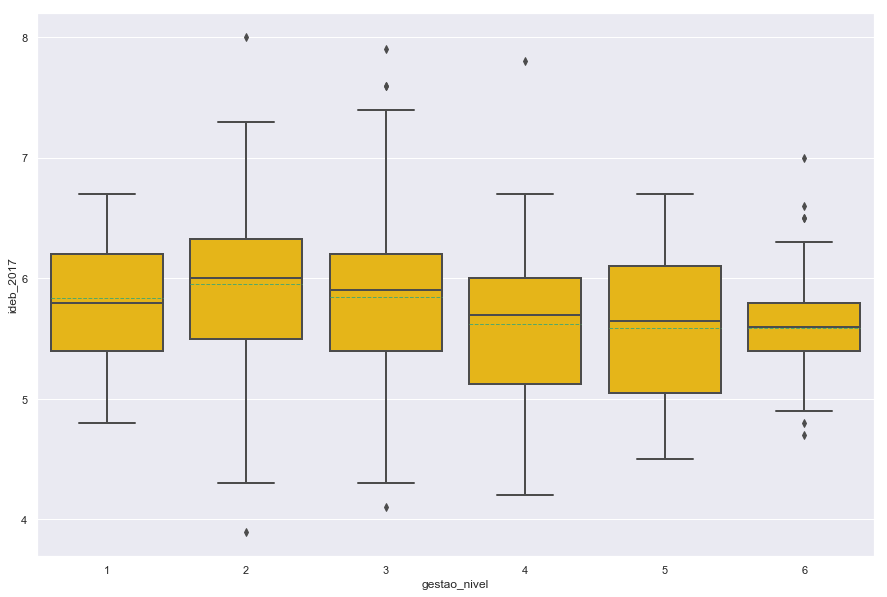

In [172]:
pylab.rcParams['figure.figsize'] = (15, 10)
ax = sns.boxplot(x="gestao_nivel", y="saeb_2017", data=saeb_gestao,
                 color=palette[0], saturation=0.8, linewidth=2,
                 showmeans=True, meanline=True)

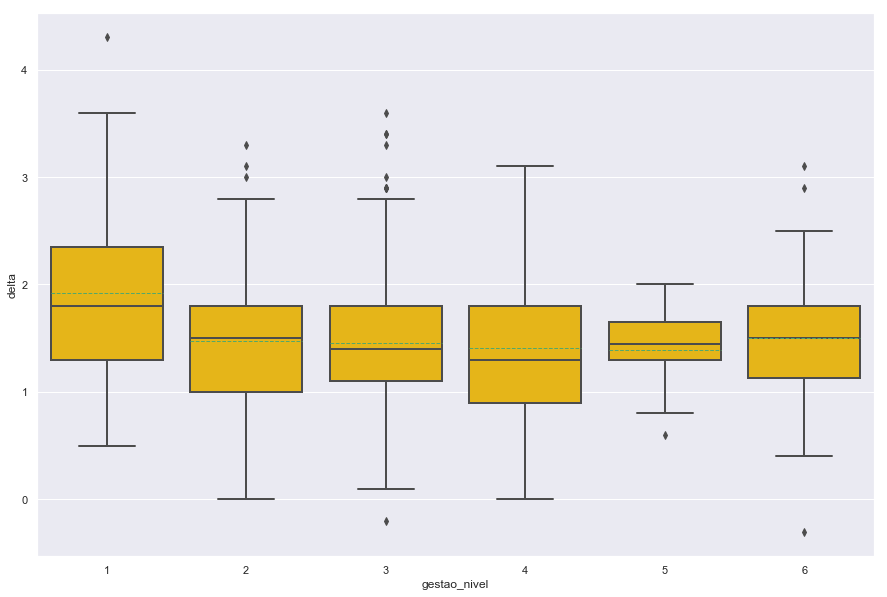

In [173]:
pylab.rcParams['figure.figsize'] = (15, 10)
ax = sns.boxplot(x="gestao_nivel", y="delta", data=saeb_gestao,
                 color=palette[0], saturation=0.8, linewidth=2,
                 showmeans=True, meanline=True)

In [191]:
closest = pd.merge(closest, proto_kepler[["cod_inep", "geometry", "lat", "lon"]].drop_duplicates(subset=["cod_inep"]), how="inner", on="cod_inep")

# Faz o mapa com os pares de escolas

In [214]:
map_geral_rio = gpd.read_file("../../shapefiles/Limite_Bairro/Limite_Bairro.shp", encoding = "latin1")
map_municipio_rio = gpd.read_file("../../shapefiles/Escolas_Municipais/Escolas_Municipais.shp", encoding = "latin1")

In [215]:
map_municipio_rio["cod_inep"] = map_municipio_rio["SMEDBOEs_4"].apply(lambda x: str(x))

In [216]:
model_neighboors.head()

,Unnamed: 0,escola_risco,cod_inep_risco,saeb_2017_risco,nome_escola,cod_inep,saeb,pessimo_pra_bom_bin,ruim_pra_bom_bin,melhora_com_final_bom_bin,distancia,geometry,lat,lon
0,0,1019064 ESCOLA MUNICIPAL ALVARO VALLE,33146110,5.541397,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,994.077052,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753
1,1,1019502 CIEP MAESTRO HEITOR VILLA LOBOS,33084106,5.374577,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,3032.706412,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753
2,2,1019206 CIEP BARAO DE ITARARE,33084068,5.401031,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,2114.404827,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753
3,3,1019210 CIEP ALBERTO PASQUALINI,33084041,5.800098,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,2610.657736,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753
4,4,1019006 ESCOLA MUNICIPAL VIVALDO RAMOS DE VASC...,33085137,5.746812,1019023 ESCOLA MUNICIPAL PESTALOZZI,33084912,6.036347,0,1,0,4459.930102,POINT (-43.67975299993937 -22.915716757043),-22.915717,-43.679753


In [217]:
model_neighboors["cod_inep_referencia"] = model_neighboors["cod_inep"].apply(lambda x: str(x))
model_neighboors["cod_inep_risco"] = model_neighboors["cod_inep_risco"].apply(lambda x: str(x))

In [218]:
pessimo_pra_bom_list = [str(x) for x in pessimo_pra_bom_list]
ruim_pra_bom_list = [str(x) for x in ruim_pra_bom_list]
referencias_list = list(model_neighboors["cod_inep_referencia"].drop_duplicates())
risco_list = list(model_neighboors["cod_inep_risco"])

In [221]:
referencias_pessimo_bom = map_municipio_rio.query("cod_inep in @pessimo_pra_bom_list and cod_inep in @referencias_list")
referencias_ruim_bom = map_municipio_rio.query("cod_inep in @ruim_pra_bom_list and cod_inep in @referencias_list and cod_inep not in @pessimo_pra_bom_list")
risco_map = map_municipio_rio.query("cod_inep in @risco_list")

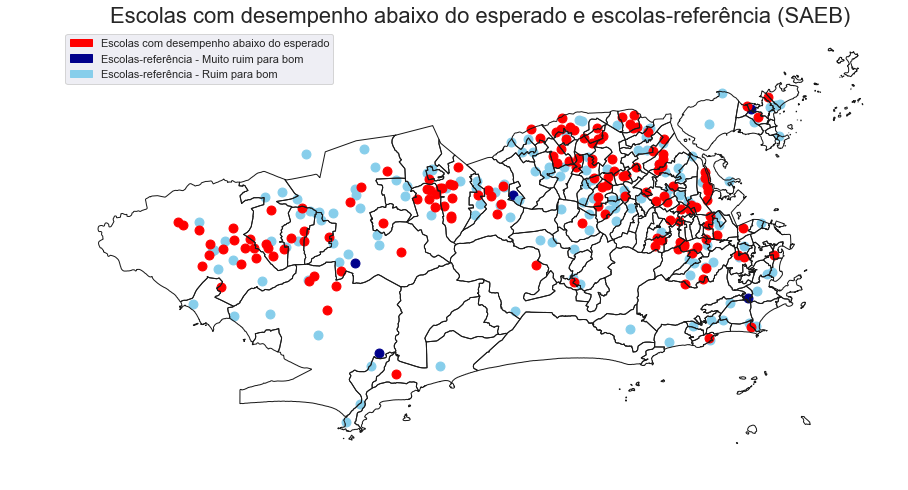

In [224]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, figsize=(18, 8))

referencias_pessimo_bom.plot(color = "darkblue", ax=ax, markersize = 80)
referencias_ruim_bom.plot(color = "skyblue", ax=ax, markersize = 80)
risco_map.plot(color = "red", ax=ax, markersize = 80)

map_geral_rio.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

plt.axis('off')

plt.title("Escolas com desempenho abaixo do esperado e escolas-referência (SAEB)", fontsize = 22)

r = mpatches.Patch(color='red', label='Escolas com desempenho abaixo do esperado')
db = mpatches.Patch(color='darkblue', label='Escolas-referência - Muito ruim para bom')
sb = mpatches.Patch(color='skyblue', label='Escolas-referência - Ruim para bom')

plt.legend(handles=[r, db, sb], loc = "upper left")

plt.savefig("point_map_risco_saeb.png", dpi = 600)

In [225]:
referencias_pessimo_bom[["cod_inep", "geometry", "SMEDBOEs_5"]].to_csv("../../referencias_pessimo_bom_saeb.csv", index = False)
referencias_ruim_bom[["cod_inep", "geometry", "SMEDBOEs_5"]].to_csv("../../referencias_ruim_bom_saeb.csv", index = False)
risco_map[["cod_inep", "geometry", "SMEDBOEs_5"]].to_csv("../../risco_map_saeb.csv", index = False)